In [3]:
import numpy as np
from matplotlib import pyplot as plt
import glob
from climtools import climtools_lib as ctl
import xarray as xr
import pickle

No DISPLAY variable set. Switching to agg backend


In [3]:
cart_out = '/home/fabiano/Research/lavori/TunECS/results/'

In [6]:
res = pickle.load(open(cart_out + 'pi_new_ts.p', 'rb'))

In [7]:
res

{('rlut',
  'p9'): <xarray.DataArray 'rlut' (time: 1692)>
 array([236.28285771, 236.57387801, 237.93574783, ..., 238.82852752,
        237.51046827, 236.80710479])
 Coordinates:
   * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 1990-12-16T12:00:00,
 ('rlut',
  'p5'): <xarray.DataArray 'rlut' (time: 1668)>
 array([240.78928759, 241.56453248, 243.29999555, ..., 241.96552994,
        240.18933935, 238.75226908])
 Coordinates:
   * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 1988-12-16T12:00:00,
 ('rsut',
  'p9'): <xarray.DataArray 'rsut' (time: 1692)>
 array([106.45053152, 104.60437881, 101.56371478, ...,  98.32258537,
        102.24054587, 104.98367818])
 Coordinates:
   * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 1990-12-16T12:00:00,
 ('rsut',
  'p5'): <xarray.DataArray 'rsut' (time: 1668)>
 array([102.53889765, 101.43653222,  98.38279945, ...,  96.13607178,
        100.12264975, 102.44480693])
 Coordinates:
   * time     (time) datetime64[ns] 1850-01-1

In [12]:
res_yr = dict()


In [16]:
for ke in res:
    res_yr[ke] = res[ke].groupby('time.year').mean()

In [14]:
ctl.gregplot_on_ax?

Signature:
ctl.gregplot_on_ax(
    ax,
    tas,
    toa,
    color=None,
    label=None,
    marker='D',
    nfirst=5,
    nlast=50,
    calc_ERF=True,
    calc_ECS=True,
    mean_nyr=True,
    check_diff=False,
    ave_in_tasbins=False,
    nyea=5,
    point_dim=20,
    ylim=None,
    xlim=None,
    ls='-',
)
Docstring: Plots on a gregory plot and calculates ERF (using first nfirst points) and ECS (using last nlast points).
File:      ~/Research/git/globothon/ClimTools/climtools/climtools_lib.py
Type:      function

array split does not result in an equal division
array split does not result in an equal division


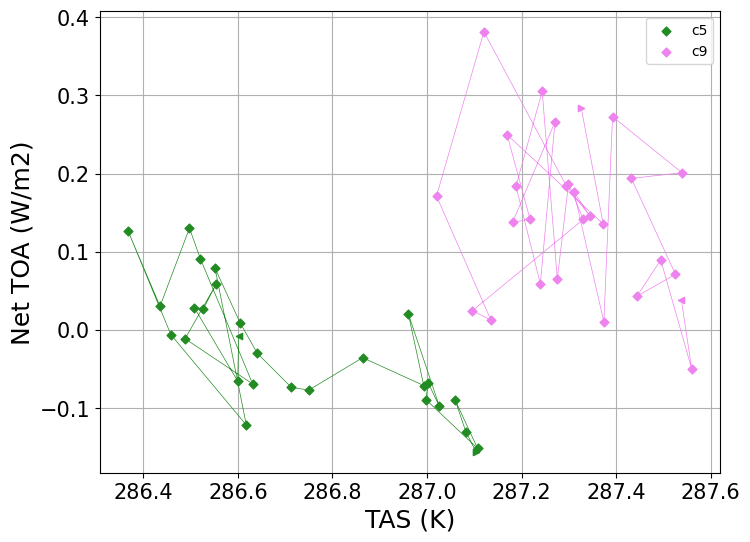

In [26]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (8,6))
ctl.gregplot_on_ax(ax, res_yr[('tas', 'p5')], -res_yr[('net_toa', 'p5')], calc_ECS= False, calc_ERF=False, color = 'forestgreen', label = 'c5')
ctl.gregplot_on_ax(ax, res_yr[('tas', 'p9')], -res_yr[('net_toa', 'p9')], calc_ECS= False, calc_ERF=False, color = 'violet', label = 'c9')
plt.grid()
plt.legend()
plt.xlabel('TAS (K)')
plt.ylabel('Net TOA (W/m2)')

plt.savefig(cart_out + 'pi_drift_tunecs.pdf')


In [29]:
-res_yr[('net_toa', 'p5')][:10].mean()

<xarray.DataArray ()>
array(-0.14315988)

In [30]:
-res_yr[('net_toa', 'p9')][:10].mean()

<xarray.DataArray ()>
array(0.20994937)

### AMOC

In [4]:
cart = '/home/fabiano/Research/lavori/TunECS/results/pi_new/'

fi5 = 'msftyz_Omon_EC-Earth3_piControl_r1i1p5f1_gn_1850-1988.nc'
fi9 = 'msftyz_Omon_EC-Earth3_piControl_r1i1p9f1_gn_1850-1988.nc'

amoc5 = xr.load_dataset(cart + fi5)
amoc9 = xr.load_dataset(cart + fi9)

In [8]:
amoc_max_5 = amoc5['msftyz'].sel(basin = 1, rlat = slice(30, 50), lev = slice(500., 2000.)).max(['rlat', 'lev']).values
amoc_max_9 = amoc9['msftyz'].sel(basin = 1, rlat = slice(30, 50), lev = slice(500., 2000.)).max(['rlat', 'lev']).values

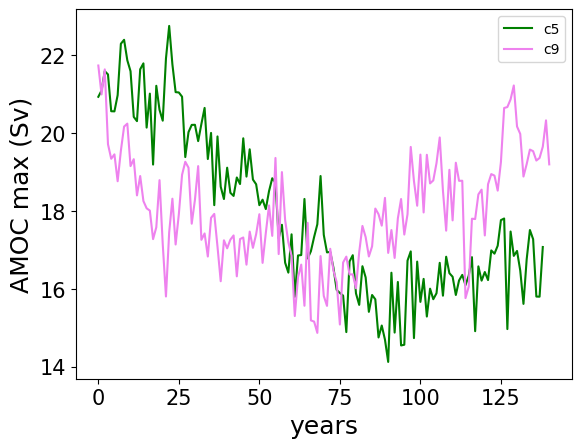

In [19]:
%matplotlib inline
fac = 1.e9
fig, ax = plt.subplots()
plt.plot(amoc_max_5/fac, color = 'green', label = 'c5')
plt.plot(amoc_max_9/fac, color = 'violet', label = 'c9')
plt.legend()
plt.ylabel('AMOC max (Sv)')
plt.xlabel('years')
#plt.grid()

plt.savefig(cart + 'amoc_pi5_pi9.pdf')